In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set nicer visuals
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Step 2: Load the dataset
df = pd.read_csv('/content/dataset (1).csv')  # Adjust name if needed

# Step 3: Show the first few rows
df.head()


,Mess_ID,Date,Weekly_Crowd,Is_Holiday,Temperature,Menu_Score,Event_Intensity_Index,Stress_Level
0,1,5/2/2010,16437,0,42.31,2.428,7.04,8.106
1,1,12/2/2010,16420,1,38.51,2.452,7.04,8.106
2,1,19-02-2010,16120,0,39.93,2.486,7.04,8.106
3,1,26-02-2010,14097,0,46.63,2.439,7.04,8.106
4,1,5/3/2010,15548,0,46.50,2.375,7.05,8.106


In [ ]:
# Check dataset info
df.info()

# Basic statistics
df.describe()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mess_ID                6435 non-null   int64  
 1   Date                   6435 non-null   object 
 2   Weekly_Crowd           6435 non-null   int64  
 3   Is_Holiday             6435 non-null   int64  
 4   Temperature            6435 non-null   float64
 5   Menu_Score             6435 non-null   float64
 6   Event_Intensity_Index  6435 non-null   float64
 7   Stress_Level           6435 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 402.3+ KB


,0
Mess_ID,0
Date,0
Weekly_Crowd,0
Is_Holiday,0
Temperature,0
Menu_Score,0
Event_Intensity_Index,0
Stress_Level,0


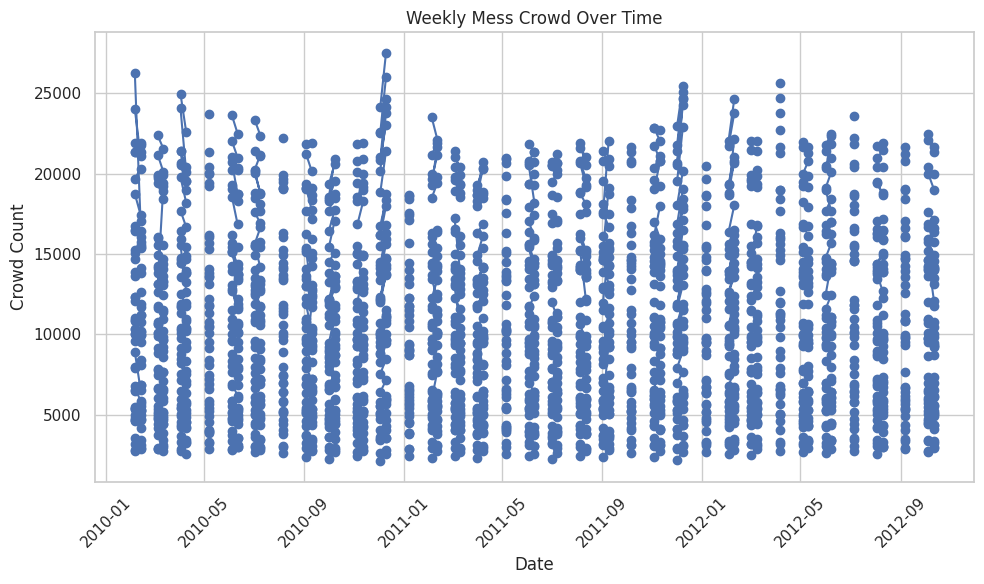

In [ ]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')



# Plot crowd over time
plt.plot(df['Date'], df['Weekly_Crowd'], marker='o')
plt.title('Weekly Mess Crowd Over Time')
plt.xlabel('Date')
plt.ylabel('Crowd Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


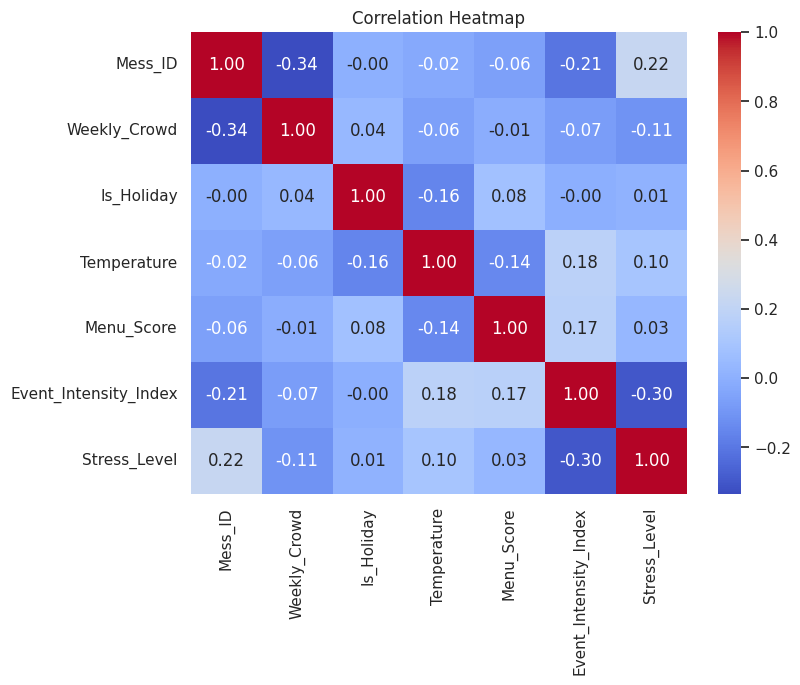

In [ ]:
# Calculate correlation between numerical columns
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


/tmp/ipython-input-7-2610587812.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Is_Holiday', y='Weekly_Crowd', palette='Set2')


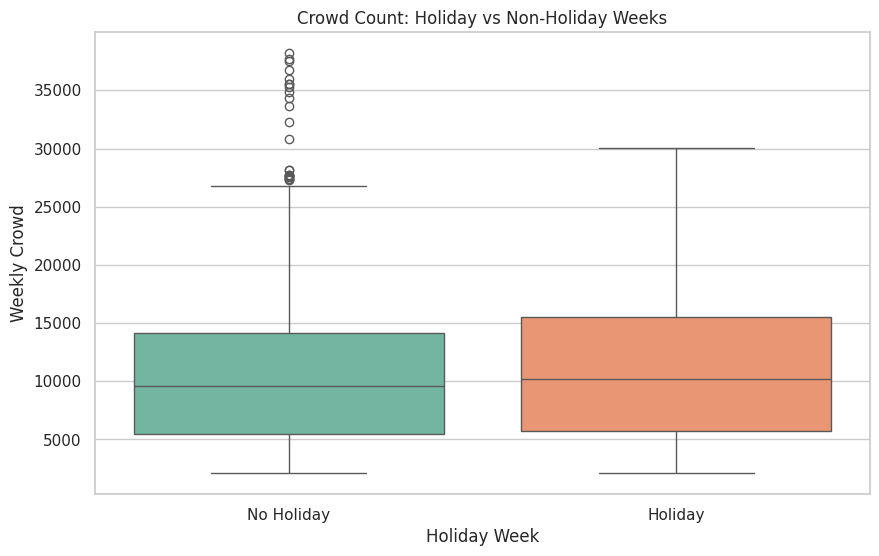

In [ ]:
sns.boxplot(data=df, x='Is_Holiday', y='Weekly_Crowd', palette='Set2')
plt.title("Crowd Count: Holiday vs Non-Holiday Weeks")
plt.xticks([0, 1], ['No Holiday', 'Holiday'])
plt.ylabel("Weekly Crowd")
plt.xlabel("Holiday Week")
plt.show()


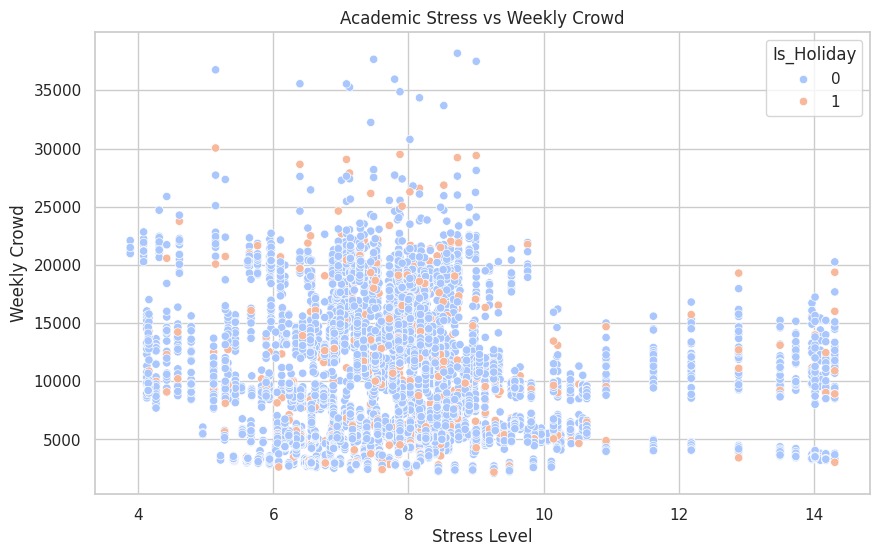

In [ ]:
sns.scatterplot(data=df, x='Stress_Level', y='Weekly_Crowd', hue='Is_Holiday', palette='coolwarm')
plt.title("Academic Stress vs Weekly Crowd")
plt.xlabel("Stress Level")
plt.ylabel("Weekly Crowd")
plt.show()


/tmp/ipython-input-9-3040908531.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Event_Intensity_Index', y='Weekly_Crowd', palette='Set3')


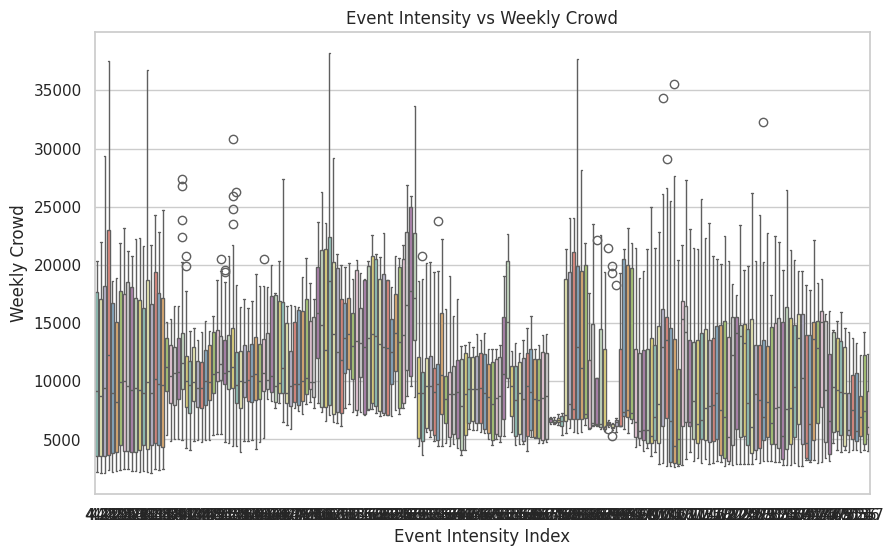

In [ ]:
sns.boxplot(data=df, x='Event_Intensity_Index', y='Weekly_Crowd', palette='Set3')
plt.title("Event Intensity vs Weekly Crowd")
plt.xlabel("Event Intensity Index")
plt.ylabel("Weekly Crowd")
plt.show()


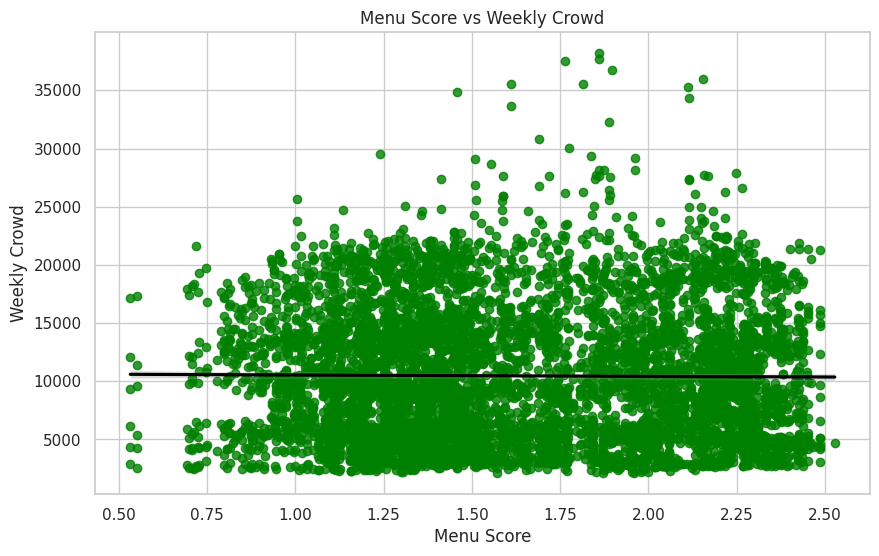

In [ ]:
sns.regplot(data=df, x='Menu_Score', y='Weekly_Crowd', scatter_kws={"color": "green"}, line_kws={"color": "black"})
plt.title("Menu Score vs Weekly Crowd")
plt.xlabel("Menu Score")
plt.ylabel("Weekly Crowd")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Select relevant features
features = ['Is_Holiday', 'Temperature', 'Menu_Score', 'Event_Intensity_Index', 'Stress_Level']
X = df[features]
y = df['Weekly_Crowd']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 4754.25
R² Score: 0.02


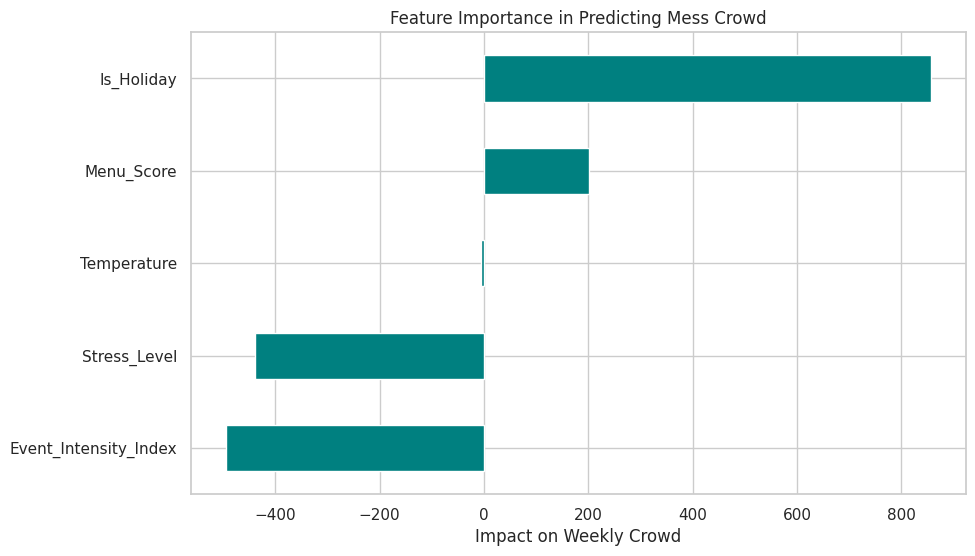

In [ ]:
# Show how each feature contributes
importance = pd.Series(model.coef_, index=features)
importance.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance in Predicting Mess Crowd")
plt.xlabel("Impact on Weekly Crowd")
plt.show()
